# Model Selection of ANN in Intestinal Absortion Prediction

This section presents the model selection of Artificial Neural Network in Intestinal Absortition Prediction.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import joblib

In [3]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV 

### Importing Dataset for training


- FC-1: NHA, LogP, MolWt, NAR, NRB, tPSA, NHD, fcSP3
- FC-2: NHA, LogP, tPSA

In [4]:
#Data_Train = joblib.load('./Dataset_Training_Test/Data_Train.pkl')

Data = pd.read_excel('dataset_HIA_geral.xlsx')

In [5]:
# Selecting Feature Composition
FC = 2

if FC == 1:
    X_Train = Data.drop(['Name','SMILES','Output'], axis=1)[0:140].values
    X_Test = Data.drop(['Name','SMILES','Output'], axis=1)[140:].values
    
else:
    X_Train = Data[['WLOGP','tPSA','NHA']][0:140].values 
    X_Test = Data[['WLOGP','tPSA','NHA']][140:].values
    

y_Train = Data[['Output']][0:140].values.ravel()
y_Test = Data[['Output']][140:].values.ravel()

In [6]:
# Scaling data

Scaler = MinMaxScaler().fit(X_Train)

X_train = Scaler.transform(X_Train)  
X_test = Scaler.transform(X_Test)  


In [7]:
joblib.dump(Scaler,'./Model_ANN_FC2/scaler.pkl')

['./Model_ANN_FC2/scaler.pkl']

### Creating and Training Model

In [8]:
# parameters of ANN models

param_grid = [{'activation': ['relu','tanh'],
               'hidden_layer_sizes': [(20), (30), (40), (50), (60), (20,20), (30,30), (40,40), (50,50), (60,60)]}]


In [9]:
# Cross Validation

ANN = MLPClassifier(solver = 'adam', max_iter = 2000, learning_rate = 'adaptive', random_state=0)


GS = GridSearchCV(ANN, param_grid, cv=10, scoring='accuracy',return_train_score=True, n_jobs=-1)

In [10]:
GS.fit(X_train, y_Train)

GridSearchCV(cv=10,
             estimator=MLPClassifier(learning_rate='adaptive', max_iter=2000,
                                     random_state=0),
             n_jobs=-1,
             param_grid=[{'activation': ['relu', 'tanh'],
                          'hidden_layer_sizes': [20, 30, 40, 50, 60, (20, 20),
                                                 (30, 30), (40, 40), (50, 50),
                                                 (60, 60)]}],
             return_train_score=True, scoring='accuracy')

In [11]:
# saving grid search

joblib.dump(GS,'./Model_ANN_FC2/GridSearch_ANN.pkl')

['./Model_ANN_FC2/GridSearch_ANN.pkl']

### Evaluating and Selecting Model

In [12]:
# loading grid search

GS_ANN = joblib.load('./Model_ANN_FC2/GridSearch_ANN.pkl')

In [13]:
# best estimator

GS_ANN.best_estimator_

MLPClassifier(hidden_layer_sizes=(30, 30), learning_rate='adaptive',
              max_iter=2000, random_state=0)

In [14]:
# index of best model

print('Best Index = {}'.format(GS_ANN.best_index_+1))

Best Index = 7


In [15]:
# best parameters

GS_ANN.best_params_

{'activation': 'relu', 'hidden_layer_sizes': (30, 30)}

In [16]:
# scores by model

cvres = GS_ANN.cv_results_

print('ANN Evaluation')
k=1
for mean_score, standard, params in zip(cvres["mean_test_score"], cvres["std_test_score"], cvres["params"]):
    print('M{}:'.format(k), round(mean_score,6), '+- {}'.format(round(standard,6)), params)
    k=k+1

ANN Evaluation
M1: 0.764286 +- 0.110887 {'activation': 'relu', 'hidden_layer_sizes': 20}
M2: 0.771429 +- 0.104978 {'activation': 'relu', 'hidden_layer_sizes': 30}
M3: 0.778571 +- 0.092857 {'activation': 'relu', 'hidden_layer_sizes': 40}
M4: 0.771429 +- 0.1 {'activation': 'relu', 'hidden_layer_sizes': 50}
M5: 0.764286 +- 0.110887 {'activation': 'relu', 'hidden_layer_sizes': 60}
M6: 0.778571 +- 0.092857 {'activation': 'relu', 'hidden_layer_sizes': (20, 20)}
M7: 0.842857 +- 0.089214 {'activation': 'relu', 'hidden_layer_sizes': (30, 30)}
M8: 0.835714 +- 0.084817 {'activation': 'relu', 'hidden_layer_sizes': (40, 40)}
M9: 0.821429 +- 0.086011 {'activation': 'relu', 'hidden_layer_sizes': (50, 50)}
M10: 0.842857 +- 0.089214 {'activation': 'relu', 'hidden_layer_sizes': (60, 60)}
M11: 0.764286 +- 0.110887 {'activation': 'tanh', 'hidden_layer_sizes': 20}
M12: 0.764286 +- 0.110887 {'activation': 'tanh', 'hidden_layer_sizes': 30}
M13: 0.764286 +- 0.110887 {'activation': 'tanh', 'hidden_layer_sizes'

In [17]:
# All the CV scores by each Feaature Composition

Nmodels = len(GS_ANN.cv_results_["params"])

col_scr=[]
row_scr=[]

for k in range(10):
    col_scr.insert(k,'CV_{}'.format(k+1))
    
    
for j in range(Nmodels):
    row_scr.insert(j,'M{}'.format(j+1))

    
df_scores=[]    
for k in range(10):

    cvres = GS_ANN.cv_results_
    score_valid=np.concatenate((cvres['split0_test_score'].reshape(Nmodels,1),
                            cvres['split1_test_score'].reshape(Nmodels,1),
                            cvres['split2_test_score'].reshape(Nmodels,1),
                            cvres['split3_test_score'].reshape(Nmodels,1),
                            cvres['split4_test_score'].reshape(Nmodels,1),
                            cvres['split5_test_score'].reshape(Nmodels,1),
                            cvres['split6_test_score'].reshape(Nmodels,1),
                            cvres['split7_test_score'].reshape(Nmodels,1),
                            cvres['split8_test_score'].reshape(Nmodels,1),
                            cvres['split9_test_score'].reshape(Nmodels,1)),axis=1) 
    df_scores = pd.DataFrame(data=score_valid,index=row_scr,columns=col_scr).transpose()

In [18]:
df_scores

,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12,M13,M14,M15,M16,M17,M18,M19,M20
CV_1,0.642857,0.642857,0.642857,0.642857,0.642857,0.642857,0.642857,0.642857,0.642857,0.642857,0.642857,0.642857,0.642857,0.642857,0.642857,0.642857,0.642857,0.642857,0.642857,0.642857
CV_2,0.571429,0.571429,0.642857,0.642857,0.571429,0.642857,0.785714,0.785714,0.785714,0.785714,0.571429,0.571429,0.571429,0.642857,0.642857,0.785714,0.785714,0.785714,0.785714,0.785714
CV_3,0.857143,0.857143,0.857143,0.857143,0.857143,0.857143,0.928571,0.928571,0.928571,0.928571,0.857143,0.857143,0.857143,0.857143,0.857143,0.928571,0.928571,0.928571,0.928571,0.928571
CV_4,0.928571,0.928571,0.928571,0.928571,0.928571,0.928571,0.928571,0.928571,0.928571,0.928571,0.928571,0.928571,0.928571,0.928571,0.928571,0.928571,0.928571,0.928571,0.928571,0.928571
CV_5,0.857143,0.857143,0.857143,0.857143,0.857143,0.857143,0.857143,0.857143,0.857143,0.857143,0.857143,0.857143,0.857143,0.857143,0.857143,0.857143,0.857143,0.857143,0.857143,0.857143
CV_6,0.785714,0.785714,0.785714,0.785714,0.785714,0.857143,0.928571,0.857143,0.857143,0.928571,0.785714,0.785714,0.785714,0.785714,0.785714,0.857143,0.785714,0.785714,0.785714,0.785714
CV_7,0.642857,0.714286,0.714286,0.642857,0.642857,0.714286,0.785714,0.785714,0.785714,0.785714,0.642857,0.642857,0.642857,0.714286,0.642857,0.785714,0.785714,0.785714,0.785714,0.785714
CV_8,0.857143,0.857143,0.857143,0.857143,0.857143,0.785714,0.928571,0.928571,0.857143,0.928571,0.857143,0.857143,0.857143,0.857143,0.857143,0.928571,0.928571,0.928571,0.928571,0.928571
CV_9,0.785714,0.785714,0.785714,0.785714,0.785714,0.785714,0.857143,0.857143,0.857143,0.857143,0.785714,0.785714,0.785714,0.785714,0.785714,0.785714,0.785714,0.785714,0.785714,0.785714
CV_10,0.714286,0.714286,0.714286,0.714286,0.714286,0.714286,0.785714,0.785714,0.714286,0.785714,0.714286,0.714286,0.714286,0.714286,0.714286,0.714286,0.714286,0.714286,0.714286,0.714286


In [19]:
df_scores.describe()

,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12,M13,M14,M15,M16,M17,M18,M19,M20
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.764286,0.771429,0.778571,0.771429,0.764286,0.778571,0.842857,0.835714,0.821429,0.842857,0.764286,0.764286,0.764286,0.778571,0.771429,0.821429,0.814286,0.814286,0.814286,0.814286
std,0.116885,0.110657,0.097880,0.105409,0.116885,0.097880,0.094040,0.089405,0.090664,0.094040,0.116885,0.116885,0.116885,0.097880,0.105409,0.096715,0.096421,0.096421,0.096421,0.096421
min,0.571429,0.571429,0.642857,0.642857,0.571429,0.642857,0.642857,0.642857,0.642857,0.642857,0.571429,0.571429,0.571429,0.642857,0.642857,0.642857,0.642857,0.642857,0.642857,0.642857
25%,0.660714,0.714286,0.714286,0.660714,0.660714,0.714286,0.785714,0.785714,0.785714,0.785714,0.660714,0.660714,0.660714,0.714286,0.660714,0.785714,0.785714,0.785714,0.785714,0.785714
50%,0.785714,0.785714,0.785714,0.785714,0.785714,0.785714,0.857143,0.857143,0.857143,0.857143,0.785714,0.785714,0.785714,0.785714,0.785714,0.821429,0.785714,0.785714,0.785714,0.785714
75%,0.857143,0.857143,0.857143,0.857143,0.857143,0.857143,0.928571,0.910714,0.857143,0.928571,0.857143,0.857143,0.857143,0.857143,0.857143,0.910714,0.910714,0.910714,0.910714,0.910714
max,0.928571,0.928571,0.928571,0.928571,0.928571,0.928571,0.928571,0.928571,0.928571,0.928571,0.928571,0.928571,0.928571,0.928571,0.928571,0.928571,0.928571,0.928571,0.928571,0.928571


(0.5, 1.05)

<Figure size 1800x1200 with 0 Axes>

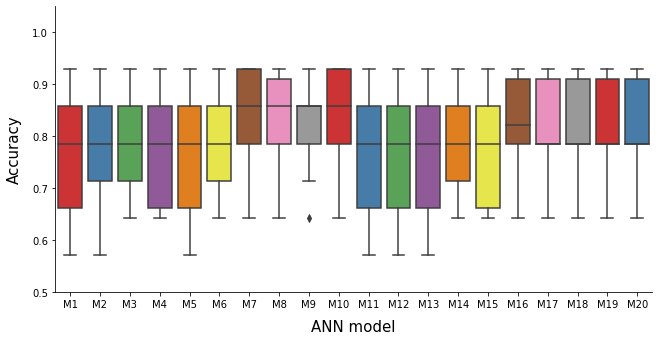

In [20]:
fig1 = plt.figure(dpi=300)

sns.catplot(kind="box",data=df_scores, height=4.5, aspect=2, palette='Set1')

plt.xlabel('ANN model',labelpad=10,fontsize=15)
plt.ylabel('Accuracy',labelpad=10,fontsize=15)
plt.ylim(0.5, 1.05)

### Saving Model

In [21]:
# saving best model

joblib.dump(GS_ANN.best_estimator_,'./Model_ANN_FC2/ANN_best_model.pkl')

['./Model_ANN_FC2/ANN_best_model.pkl']

In [22]:
# saving results

joblib.dump(df_scores,'./Model_ANN_FC2/df_scores.pkl')

['./Model_ANN_FC2/df_scores.pkl']

In [23]:
#saving figure

#fig1.savefig('./Model_ANN_FC2/fig_ANN')

### Independent Test

In [24]:
from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix

In [25]:
ANN_best = GS_ANN.best_estimator_

In [26]:
y_pred = ANN_best.predict(X_test)

In [27]:
print(classification_report(y_Test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.81      0.89        21
           1       0.84      1.00      0.91        21

    accuracy                           0.90        42
   macro avg       0.92      0.90      0.90        42
weighted avg       0.92      0.90      0.90        42



In [28]:
tn, fp, fn, tp = confusion_matrix(y_Test,y_pred).ravel()
display('Accuracy = {}'.format((tp+tn)/(tp+tn+fp+fn)))
display('Sensitivity = {}'.format(tp/(tp+fn)))
display('Specificity = {}'.format(tn/(tn+fp)))

'Accuracy = 0.9047619047619048'

'Sensitivity = 1.0'

'Specificity = 0.8095238095238095'